# Assignment No 4

### Objective :  Perform the k-mean clustering with initial centroids as m1=P1 =Cluster#1=C1 and m2=P8=cluster#2=C2. Answer the following 1] Which cluster does P6 belongs to? 2] What is the population of cluster around m2? 3] What is updated value of m1 and m2?

## Author : Siddharth Sutar
## Date : 2022-09-22

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("Loaded the required libraries...")

Loaded the required libraries...


In [2]:
df = pd.DataFrame({"Points": ["P1","P2","P3","P4","P5","P6","P7","P8"],"V1": [0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],"V2": [0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]})

df

,Points,V1,V2
0,P1,0.10,0.60
1,P2,0.15,0.71
2,P3,0.08,0.90
3,P4,0.16,0.85
4,P5,0.20,0.30
5,P6,0.25,0.50
6,P7,0.24,0.10
7,P8,0.30,0.20


In [3]:
df.describe()

,V1,V2
count,8.000000,8.000000
mean,0.185000,0.520000
std,0.076345,0.298424
min,0.080000,0.100000
25%,0.137500,0.275000
50%,0.180000,0.550000
75%,0.242500,0.745000
max,0.300000,0.900000


In [4]:
# define the clusters
k1 = [df['V1'][0],df['V2'][0]]
k2 = [df['V1'][7],df['V2'][7]]
print(f"First cluster :  {k1}")
print(f"Second cluster :  {k2}")
df.shape[0]


First cluster :  [0.1, 0.6]
Second cluster :  [0.3, 0.2]


8

## Data Visualization

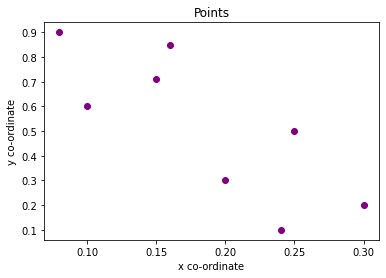

In [5]:
# showing the data graphically

# title
plt.title("Points")
# plot
plt.scatter(df['V1'],df['V2'], color='purple', marker="o")
# x and y labels
plt.xlabel("x co-ordinate")
plt.ylabel("y co-ordinate")
# show the graph
plt.show()

In [7]:
distfromC1 = []
distfromC2 = []

def manhattanDistance(x1, y1, x2, y2):
    x = abs(x2 - x1)
    y = abs(y2 - y1)
    dist = x + y
    return dist

def getTheDistances(k1,k2,DataFrame):
    idx = 0
    list1 = []
    list2 = []
    while(idx < DataFrame.shape[0]):
        Cluster1Val = manhattanDistance(k1[0],k1[1],DataFrame['V1'][idx],DataFrame['V2'][idx])
        Cluster2Val = manhattanDistance(k2[0],k2[1],DataFrame['V1'][idx],DataFrame['V2'][idx])
        list1.append(Cluster1Val)
        list2.append(Cluster2Val)
        idx = idx + 1
    return list1,list2

distfromC1,distfromC2 = getTheDistances(k1,k2,df)

# print(distfromC1,distfromC2)

def assignTheCluster(distfromC1 = [],distfromC2 = [],dataframe = pd.DataFrame()):
    F1list1 = [] # v1 for the cluster 1
    F1list2 = [] # v2 for the cluster 1
    F2list1 = [] # v1 for the cluster 2
    F2list2 = [] # v2 for the cluster 2
    idx = 0
    while(idx < 8):
        if(distfromC1[idx] < distfromC2[idx]):
            F1list1.append(df['V1'][idx])
            F1list2.append(df['V2'][idx])
        else:
            F2list1.append(df['V1'][idx])
            F2list2.append(df['V2'][idx])
        idx = idx + 1
    clusterFrame1 = pd.DataFrame({'V1': F1list1,'V2': F1list2})
    clusterFrame2 = pd.DataFrame({'V1': F2list1,'V2': F2list2})
    return clusterFrame1,clusterFrame2

k1frame, k2frame = assignTheCluster(distfromC1,distfromC2,df)

# elements belonging to cluster 1
# print(k1)
print(k1frame)
# # elements belonging to cluster 2
# print(k2)
print(k2frame)

def loopAndUpdate(k1frame = pd.DataFrame(),k2frame = pd.DataFrame()):
    noOfElementsInCluster1 = k1frame.shape[0]
    noOfElementsInCluster2 = k2frame.shape[0]
    updatedElementsForCluster1 = 9999
    updatedElementsForCluster2 = 9999
    iteration = 0
    while((noOfElementsInCluster2 != updatedElementsForCluster2) and (noOfElementsInCluster1 != updatedElementsForCluster1)):
        noOfElementsInCluster1 = k1frame.shape[0]
        noOfElementsInCluster2 = k2frame.shape[0]
        f1val1 = k1frame['V1'].mean()
        f1val2 = k1frame['V2'].mean()
        f2val1 = k2frame['V1'].mean()
        f2val2 = k2frame['V2'].mean()
        k1 = [f1val1,f1val2]
        k2 = [f2val1,f2val2]
        print(k1,k2)
        dist1,dist2 = getTheDistances(k1,k2,df)
        k1frame,k2frame = assignTheCluster(dist1,dist2,df)
        print(f"for Iteration {iteration}")
        print(k1frame)
        print(f"\n{k2frame}")
        updatedElementsForCluster1 = k1frame.shape[0]
        updatedElementsForCluster2 = k2frame.shape[0]
        iteration = iteration + 1
    return k1frame,k2frame
    


k1newFrame,k2newFrame = loopAndUpdate(k1frame,k2frame)

     V1    V2
0  0.10  0.60
1  0.15  0.71
2  0.08  0.90
3  0.16  0.85
4  0.25  0.50
     V1   V2
0  0.20  0.3
1  0.24  0.1
2  0.30  0.2
[0.148, 0.712] [0.24666666666666667, 0.20000000000000004]
for Iteration 0
     V1    V2
0  0.10  0.60
1  0.15  0.71
2  0.08  0.90
3  0.16  0.85

     V1   V2
0  0.20  0.3
1  0.25  0.5
2  0.24  0.1
3  0.30  0.2
[0.1225, 0.765] [0.2475, 0.275]
for Iteration 1
     V1    V2
0  0.10  0.60
1  0.15  0.71
2  0.08  0.90
3  0.16  0.85

     V1   V2
0  0.20  0.3
1  0.25  0.5
2  0.24  0.1
3  0.30  0.2


In [33]:
k1newFrame

,V1,V2
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85


In [34]:
k2newFrame

,V1,V2
0,0.20,0.3
1,0.25,0.5
2,0.24,0.1
3,0.30,0.2


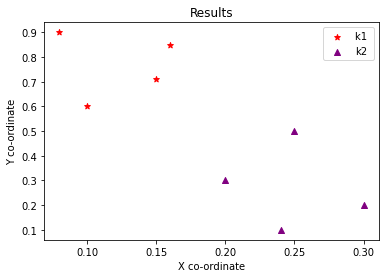

In [9]:

# title
plt.title("Results")
# plot
plt.scatter(k1newFrame['V1'], k1newFrame["V2"],color='red',marker='*',label="k1 ")
plt.scatter(k2newFrame['V1'], k2newFrame["V2"],color='purple',marker='^',label="k2")
# x and y labels
plt.xlabel("X co-ordinate")
plt.ylabel("Y co-ordinate")
# save
plt.savefig("results.jpg")
# display legend
plt.legend()
# show
plt.show()